In [31]:
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np

In [32]:
#conversions
num_a, num_b, num_c, num_d, num_e = 15455, 15228, 15231, 15024, 15291
click_a, click_b, click_c, click_d, click_e = 1782, 1965, 1934, 1899, 1969
rate_a, rate_b, rate_c, rate_d, rate_e = click_a / num_a, click_b / num_b, click_c / num_c, click_d / num_d, click_e / num_e

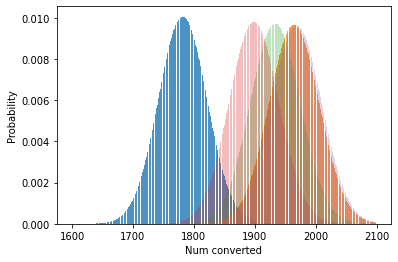

In [40]:
# retention probability
clicks = np.arange(1600, 2100)
prob_a = binom(num_a, rate_a).pmf(clicks)
prob_b = binom(num_b, rate_b).pmf(clicks)
prob_c = binom(num_c, rate_c).pmf(clicks)
prob_d = binom(num_d, rate_d).pmf(clicks)
prob_e = binom(num_e, rate_e).pmf(clicks)

# charts
plt.bar(clicks, prob_a, label="Control", alpha=0.8)
plt.bar(clicks, prob_b, label="A", alpha=0.8)
plt.bar(clicks, prob_c, label="B", alpha=0.3)
plt.bar(clicks, prob_d, label="C", alpha=0.3)
plt.bar(clicks, prob_e, label="D", alpha=0.3)
plt.xlabel("Num converted"); plt.ylabel("Probability");

In [34]:
n = num_a + num_b
prate = (click_a + click_b) / n
#standard deviation of a + b variants
psd = binom.std(n, prate, loc=0)

In [41]:
print(clicks)

[1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611 1612 1613
 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625 1626 1627
 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639 1640 1641
 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653 1654 1655
 1656 1657 1658 1659 1660 1661 1662 1663 1664 1665 1666 1667 1668 1669
 1670 1671 1672 1673 1674 1675 1676 1677 1678 1679 1680 1681 1682 1683
 1684 1685 1686 1687 1688 1689 1690 1691 1692 1693 1694 1695 1696 1697
 1698 1699 1700 1701 1702 1703 1704 1705 1706 1707 1708 1709 1710 1711
 1712 1713 1714 1715 1716 1717 1718 1719 1720 1721 1722 1723 1724 1725
 1726 1727 1728 1729 1730 1731 1732 1733 1734 1735 1736 1737 1738 1739
 1740 1741 1742 1743 1744 1745 1746 1747 1748 1749 1750 1751 1752 1753
 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764 1765 1766 1767
 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777 1778 1779 1780 1781
 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791 1792 1793 1794 1795
 1796 

In [30]:
import statsmodels.stats.api as sms

es = (rate_b - rate_a)/psd
sms.NormalIndPower().solve_power(effect_size=es, nobs1=n, power=None, alpha=0.05, ratio=1.0)


0.05010080913492124

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (500,) and arg 1 with shape (2000,).

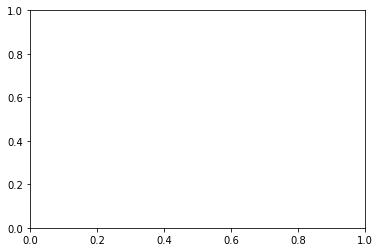

[3.07019783e-06 3.25334871e-06 3.44709860e-06 ... 4.97663533e-38
 4.36407705e-38 3.82655390e-38]


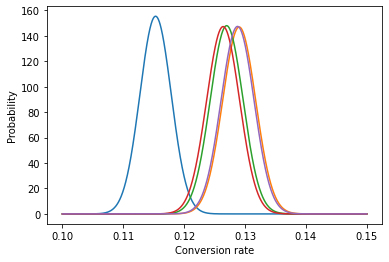

In [38]:
#account for difference in users per var, normal

from scipy.stats import norm

# normal approximation
std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)
std_c = np.sqrt(rate_c * (1 - rate_c) / num_c)
std_d = np.sqrt(rate_d * (1 - rate_d) / num_d)
std_e = np.sqrt(rate_e * (1 - rate_e) / num_e)

click_rate = np.linspace(0.1, 0.15, 2000)
prob_a = norm(rate_a, std_a).pdf(click_rate)
prob_b = norm(rate_b, std_b).pdf(click_rate)
prob_c = norm(rate_c, std_c).pdf(click_rate)
prob_d = norm(rate_d, std_d).pdf(click_rate)
prob_e = norm(rate_e, std_e).pdf(click_rate)

#plots
plt.plot(click_rate, prob_a, label="Control")
plt.plot(click_rate, prob_b, label="A")
plt.plot(click_rate, prob_c, label="B")
plt.plot(click_rate, prob_d, label="C")
plt.plot(click_rate, prob_e, label="D")
plt.xlabel("Conversion rate"); plt.ylabel("Probability");
print(prob_a, )

In [ ]:
def get_confidence_ab_test(click_a, num_a, click_b, num_b):
    rate_a = click_a / num_a
    rate_b = click_b / num_b
    std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
    std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)
    z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
    return norm.cdf(z_score)

print(get_confidence_ab_test(click_a, num_a, click_b, num_b))

In [ ]:
# get z score - between control and var 1 (the winner)
z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
print(f"z-score: {z_score:0.3f}, pval {norm().sf(z_score):0.3f}")

In [ ]:
#on a chart 
p = norm(rate_b - rate_a, np.sqrt(std_a**2 + std_b**2))
x = np.linspace(0, 0.15, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(b>a)", alpha=0.3)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))